In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
new_df = pd.read_csv('new_file.csv')
new_df

,sub_mono,cover,sub_doble,sub_doble_intermitente,directo_cantar,trend,likes,views,comments,saved,compartidos,encoded_color,encoded_light
0,1,0,0,0,1,1,67100,281500,225,8412,2042,0,0
1,1,1,0,0,1,0,7372,58400,66,729,52,1,1
2,0,1,0,0,0,0,5927,46000,67,725,242,0,0
3,1,1,1,0,1,0,110000,746100,614,18500,2509,0,0
4,1,0,0,0,0,1,6812,921000,651,836,54,0,2
5,1,0,1,0,0,0,8662,777000,96,1786,541,0,2
6,0,0,1,1,0,1,216,3589,4,43,13,0,2
7,0,0,1,1,0,0,147,2677,147,18,1,0,2
8,0,0,1,0,0,0,688,8972,23,48,3,0,2
9,0,0,1,1,0,1,152000,121400,137,2249,486,0,2


In [6]:
def calculate_std_counts(binary_column, numerical_column):
    within_std_left_1 = 0
    within_std_right_1 = 0
    within_2std_right_1 = 0
    beyond_2std_right_1 = 0

    within_std_left_0 = 0
    within_std_right_0 = 0
    within_2std_right_0 = 0
    beyond_2std_right_0 = 0

    mean = numerical_column.mean()
    std = numerical_column.std()

    for idx, value in enumerate(binary_column):
        if value == 1 and 0 <= numerical_column[idx] < mean:
            within_std_left_1 += 1
        elif value == 1 and mean <= numerical_column[idx] < (mean + std):
            within_std_right_1 += 1
        elif value == 1 and mean <= numerical_column[idx] < (mean + 2 * std):
            within_2std_right_1 += 1
        elif value == 1 and numerical_column[idx] > (mean + 2 * std):
            beyond_2std_right_1 += 1
        elif value == 0 and 0 <= numerical_column[idx] < mean:
            within_std_left_0 += 1
        elif value == 0 and mean <= numerical_column[idx] < (mean + std):
            within_std_right_0 += 1
        elif value == 0 and mean <= numerical_column[idx] < (mean + 2 * std):
            within_2std_right_0 += 1
        elif value == 0 and numerical_column[idx] > (mean + 2 * std):
            beyond_2std_right_0 += 1
        counts = within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1

    return counts

In [7]:
def plot_std_counts(binary_column, numerical_column, title='', xlabel='', ylabel=''):
    within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1 = calculate_std_counts(binary_column, numerical_column)
    categories = ['No&Left Std', 'No&Right Std', 'No&2Right Std', 'No&2+Right Std', 'Yes&Left Std', 'Yes&Right Std', 'Yes&2Right Std', 'Yes&2+Right Std']
    counts = [within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1]
    colors = ['red', 'red', 'red', 'red', 'skyblue', 'skyblue', 'skyblue', 'skyblue']

    plt.figure(figsize=(12, 4))  # Adjusted size to be smaller
    bars= plt.bar(categories, counts, color=colors[:4] + colors[4:])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom')
    plt.show()

In [9]:
target_description = new_df.describe()

In [10]:
target_description.drop(['sub_mono','cover','sub_doble','sub_doble_intermitente', 'trend','directo_cantar','encoded_color','encoded_light'], axis='columns')

,likes,views,comments,saved,compartidos
count,29.000000,2.900000e+01,29.000000,29.00000,29.000000
mean,74813.896552,5.018429e+05,416.586207,11997.00000,2391.689655
std,114674.865238,6.986006e+05,494.162966,20401.81835,4089.731436
min,147.000000,2.677000e+03,4.000000,18.00000,1.000000
25%,5927.000000,5.810000e+04,66.000000,725.00000,54.000000
50%,29700.000000,2.032000e+05,189.000000,2823.00000,458.000000
75%,126700.000000,7.770000e+05,651.000000,18500.00000,2048.000000
max,556900.000000,3.400000e+06,1585.000000,98000.00000,14500.000000


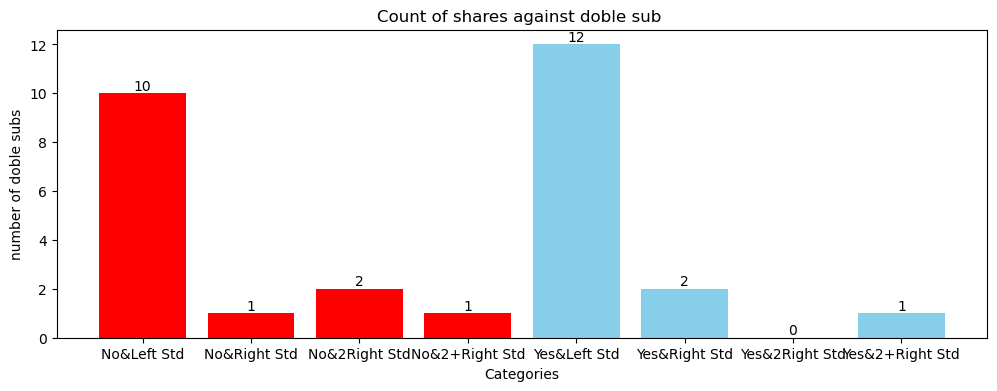

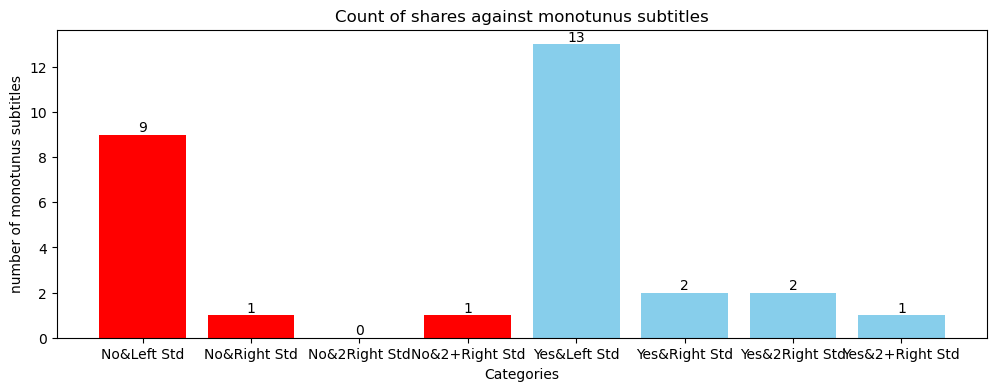

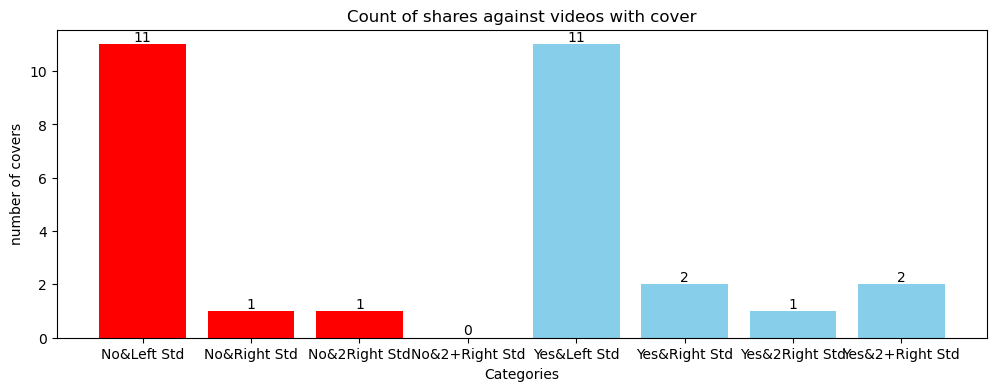

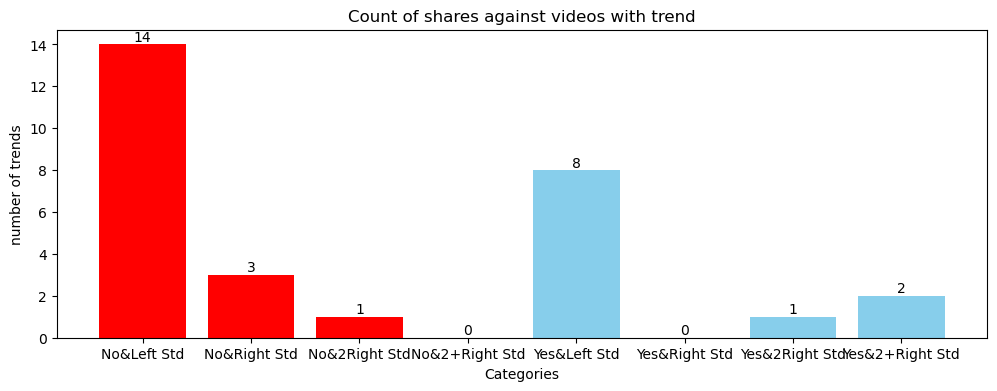

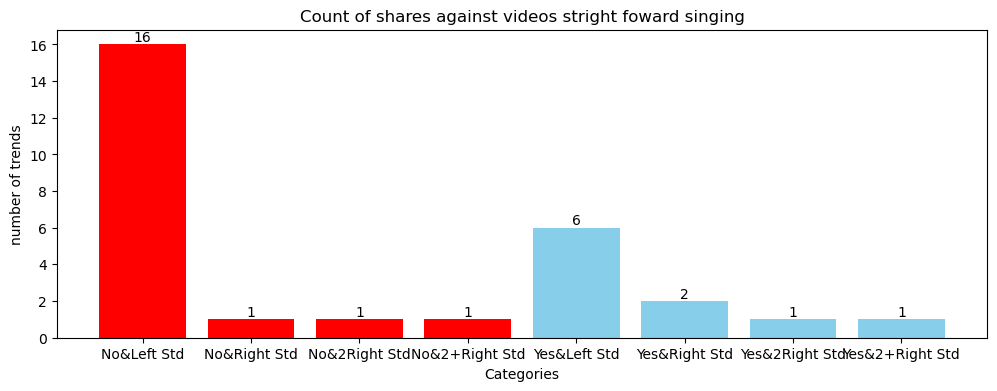

In [11]:
plot_std_counts(new_df['sub_doble'], new_df['compartidos'], title='Count of shares against doble sub ', xlabel='Categories', ylabel='number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['compartidos'], title='Count of shares against monotunus subtitles', xlabel='Categories', ylabel='number of monotunus subtitles')
plot_std_counts(new_df['cover'], new_df['compartidos'], title='Count of shares against videos with cover', xlabel='Categories', ylabel='number of covers')
plot_std_counts(new_df['trend'], new_df['compartidos'], title='Count of shares against videos with trend', xlabel='Categories', ylabel='number of trends')
plot_std_counts(new_df['directo_cantar'], new_df['compartidos'], title='Count of shares against videos stright foward singing', xlabel='Categories', ylabel='number of trends')

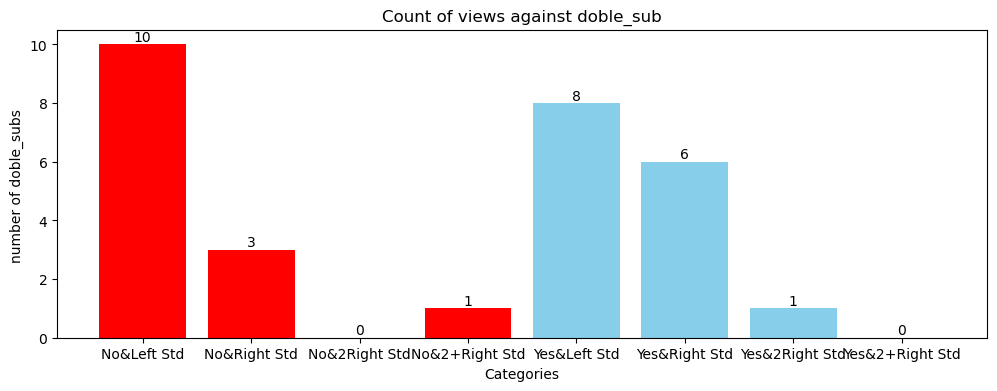

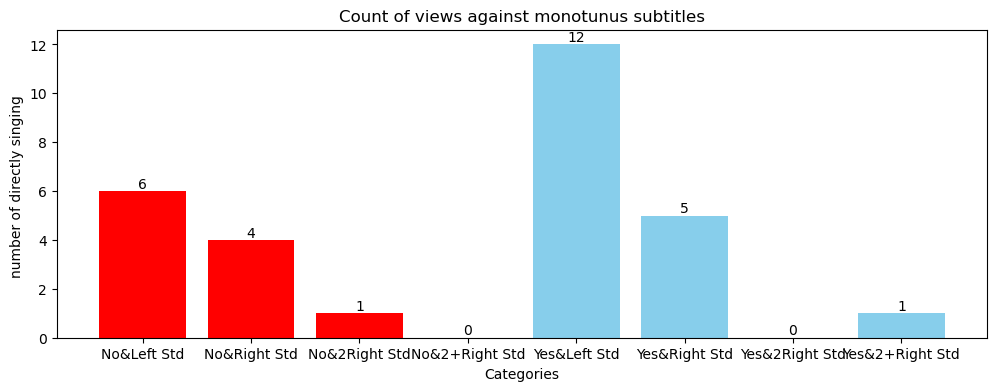

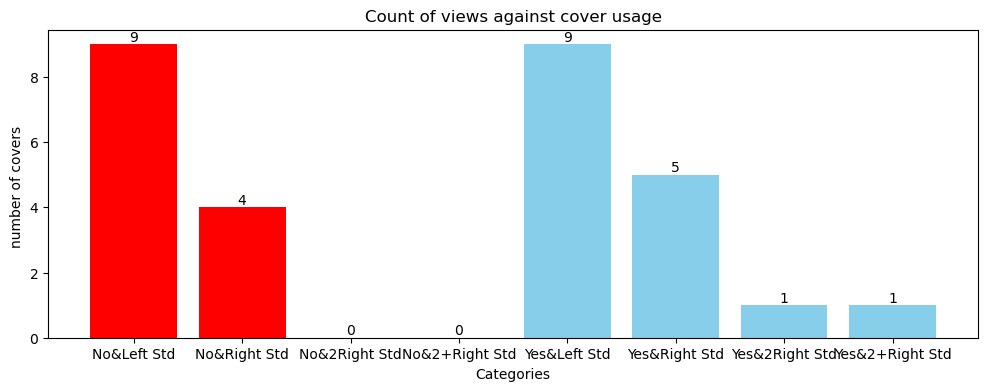

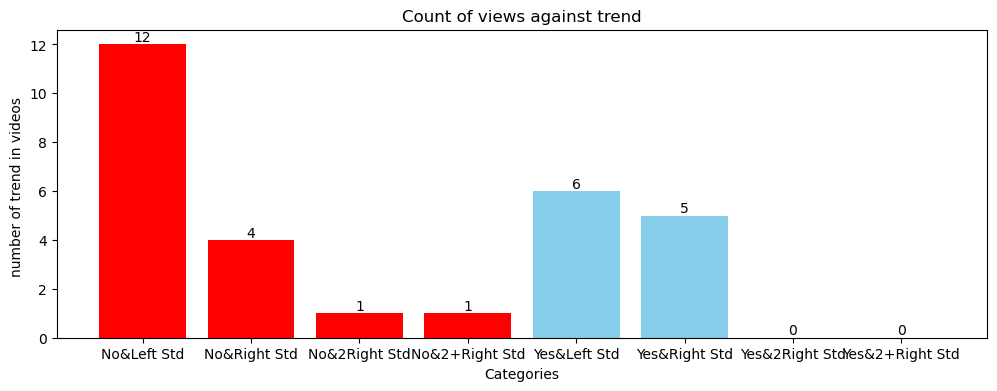

In [12]:
plot_std_counts(new_df['sub_doble'], new_df['views'], title='Count of views against doble_sub', xlabel='Categories', ylabel='number of doble_subs ')
plot_std_counts(new_df['sub_mono'], new_df['views'], title='Count of views against monotunus subtitles', xlabel='Categories', ylabel='number of directly singing ')
plot_std_counts(new_df['cover'], new_df['views'], title='Count of views against cover usage', xlabel='Categories', ylabel='number of covers ')
plot_std_counts(new_df['trend'], new_df['views'], title='Count of views against trend', xlabel='Categories', ylabel='number of trend in videos ')

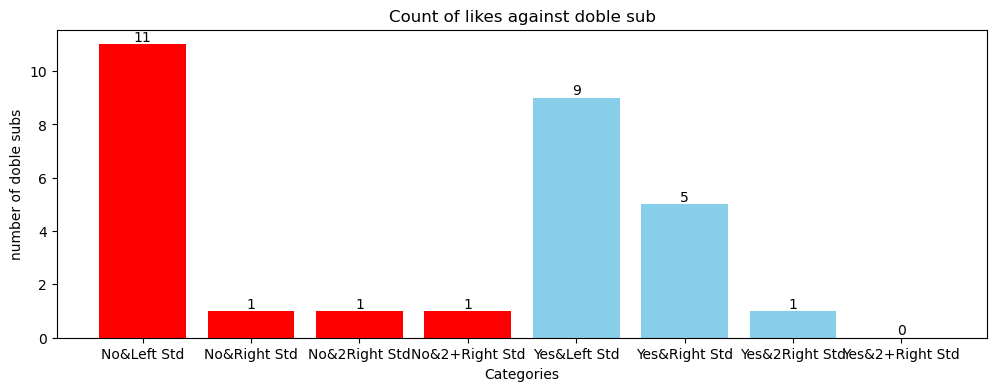

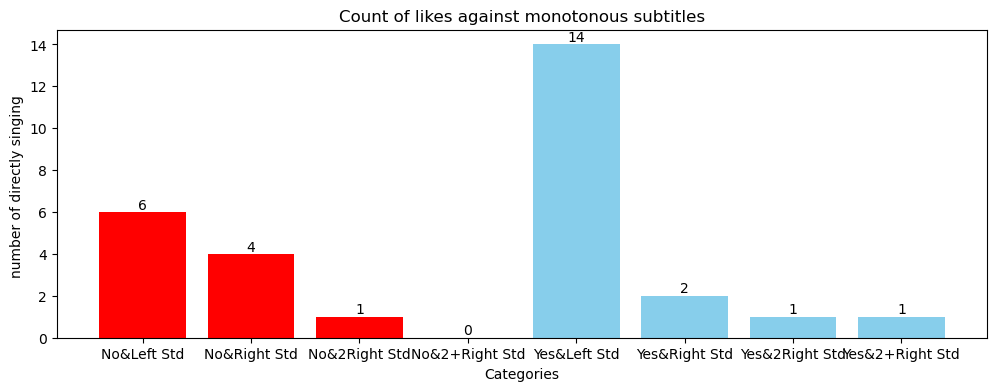

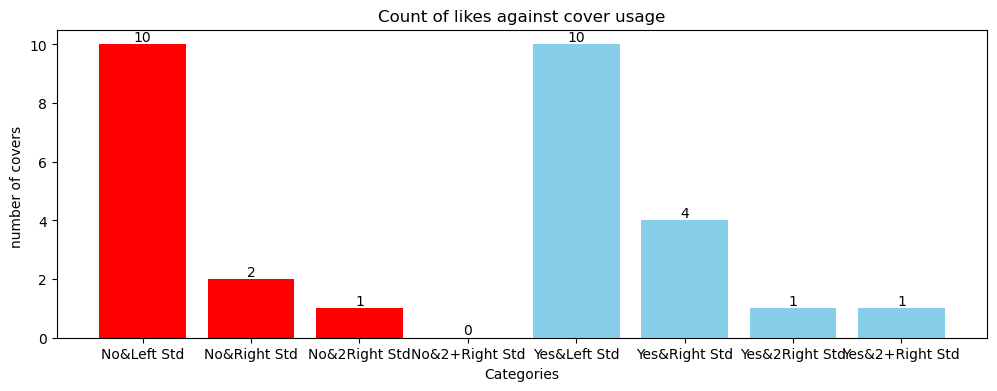

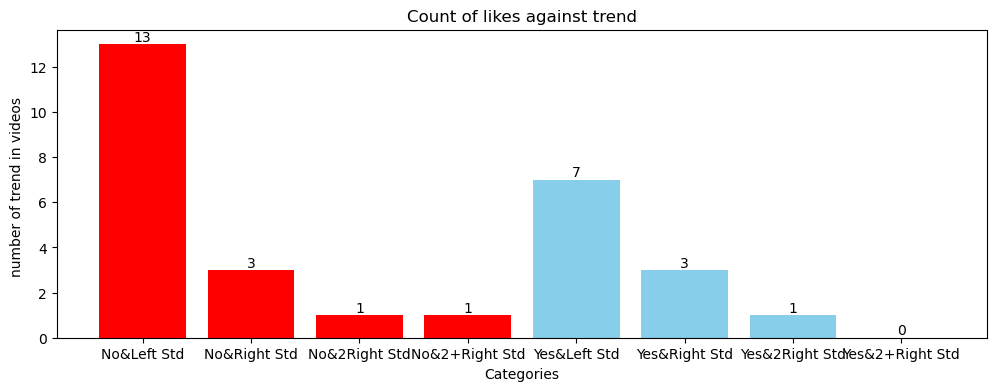

In [13]:
plot_std_counts(new_df['sub_doble'], new_df['likes'], title='Count of likes against doble sub', xlabel='Categories', ylabel='number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['likes'], title='Count of likes against monotonous subtitles', xlabel='Categories', ylabel='number of directly singing ')
plot_std_counts(new_df['cover'], new_df['likes'], title='Count of likes against cover usage', xlabel='Categories', ylabel='number of covers ')
plot_std_counts(new_df['trend'], new_df['likes'], title='Count of likes against trend', xlabel='Categories', ylabel='number of trend in videos ')

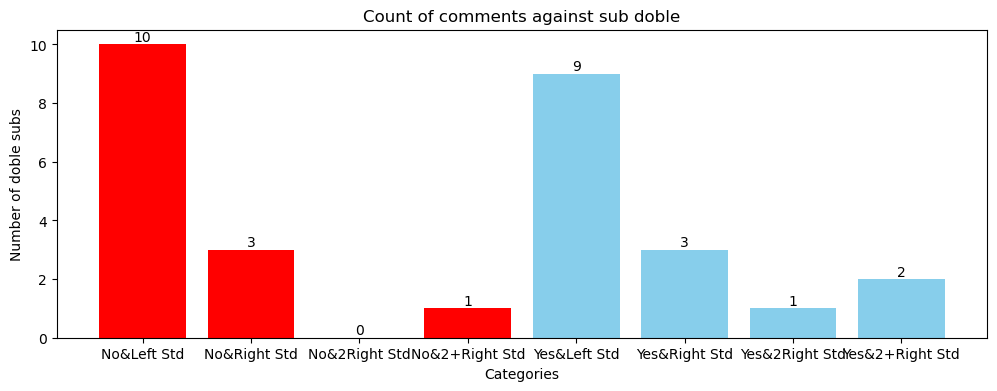

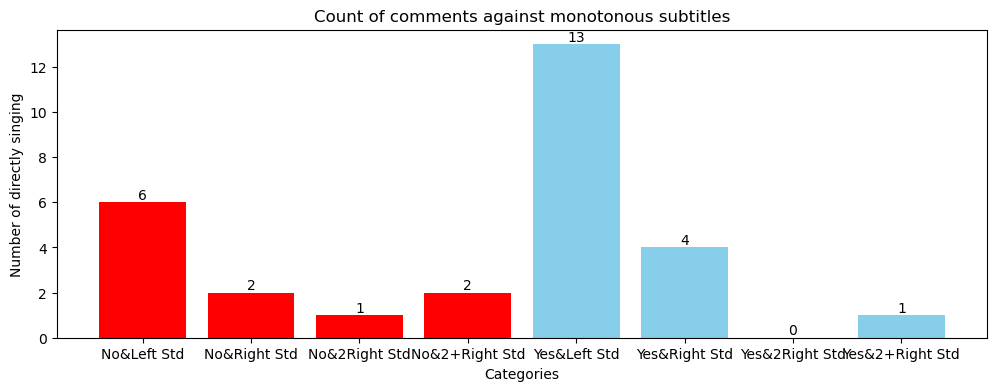

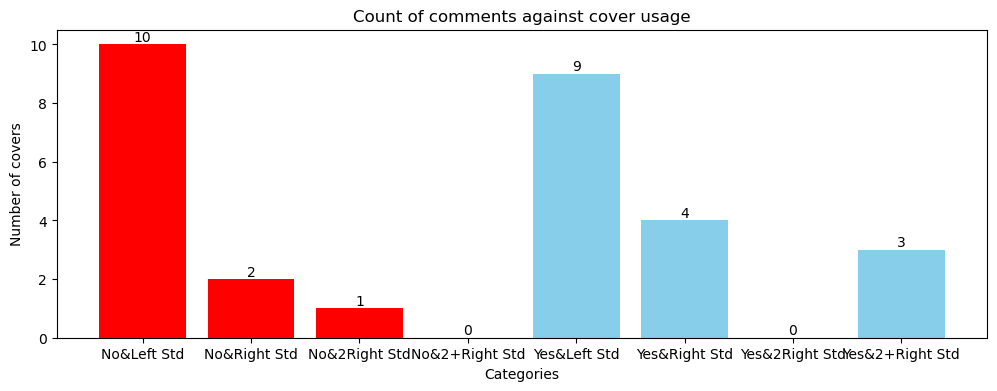

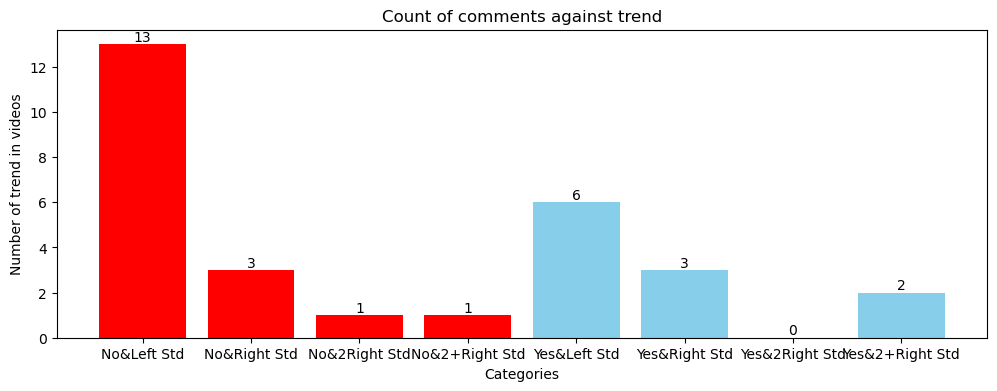

In [14]:
plot_std_counts(new_df['sub_doble'], new_df['comments'], title='Count of comments against sub doble', xlabel='Categories', ylabel='Number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['comments'], title='Count of comments against monotonous subtitles', xlabel='Categories', ylabel='Number of directly singing')
plot_std_counts(new_df['cover'], new_df['comments'], title='Count of comments against cover usage', xlabel='Categories', ylabel='Number of covers')
plot_std_counts(new_df['trend'], new_df['comments'], title='Count of comments against trend', xlabel='Categories', ylabel='Number of trend in videos')